<a href="https://colab.research.google.com/github/vlochub/MIT-Xpro-colab/blob/main/XGBoost_Assignment_15_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from datetime import datetime
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.simplefilter(action="ignore", category=UserWarning)
print(xgboost.__version__)

3.0.4


## Dataset Import

Using the LendingClub loans dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "drive/MyDrive/Colab Notebooks/MIT XPro/loans.csv"
df =  pd.read_csv(url, index_col= False )


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      9516 non-null   int64  
 1   installment  9516 non-null   int64  
 2   log_income   9516 non-null   float64
 3   fico_score   9516 non-null   int64  
 4   rev_balance  9516 non-null   float64
 5   inquiries    9516 non-null   int64  
 6   records      9516 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 520.5 KB


In [ ]:
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [ ]:
df.default.value_counts(normalize=True)

,proportion
default,
0,0.840164
1,0.159836


## Training and Test Datasets

Let's split the data 70/30 into a training set (which we will use to build models) and a test set (on which we will evaluate any model we build).

In [ ]:

X = df.drop(['default'], axis=1)
y = df['default']


# Encode string class values as integers to avoid errors in newer versions of XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)


# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set=[(X_test, y_test)]
print(X_train.shape, X_test.shape)


(6661, 6) (2855, 6)


In [ ]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.05,
    seed=9616,
    max_depth=20,
    gamma=10,
    early_stopping_rounds=20,
    eval_metric="auc",
    n_estimators=500)

clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)

print(datetime.now()-st)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


Initializing xgboost.sklearn.XGBClassifier and starting training...
0:00:00.154714
Accuracy: 83.4325744308%
ROC-AUC: 50.0000000000%


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

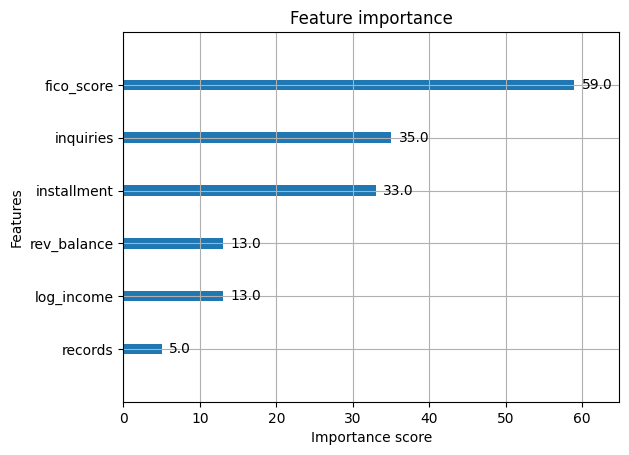

In [ ]:
xgboost.plot_importance(clf)